In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np 
sns.set()

In [41]:
# get directory
os.getcwd()
os.chdir('C:\\Users\\Administrator\\PycharmProjects\\Pheonix Egg\\Wine Project')

In [45]:
#download data
wine = pd.read_csv('winequality-red.csv')
wine = wine.dropna()
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


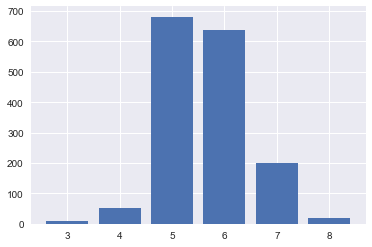

In [46]:
x=wine.quality.unique()
y= wine.quality.value_counts()
plt.bar(x,y)
plt.show()

In [47]:
wine['rating'] = wine.quality[wine.quality >= 6]
wine['rating'] = wine['rating'].replace((6,7,8),1)
wine['rating'] = wine['rating'].replace(np.nan,0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0


# Inferential Statistics 
After we create new variable 'Rating'. We seperate wine into two catagories which have more than 5 rating and which have less than 5.
We will refer them as good wine and bad wine in the following procedure. Then, we try to run some test related to independence variables. 
The variables that have direct effect on rating are volatile acidity,citric acid,total sulfur dioxide,density,sulphates, and alcohol.
Our test will be consist of two step : 
    * plotting ecdf of each group to see whether the distribution of each group (good wine, bad wine) is the same or not 
    * using bootstrapping method to test if there is any significant difference in mean of feature between bad wine and good wine 


In [48]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

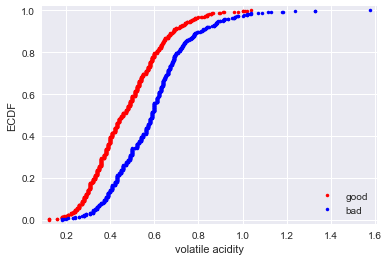

p-value = 1.0


In [49]:
# test good wine and bad wine samples on volatile acidity 
good_wine = wine[wine.rating == 1]
bad_wine = wine[wine.rating == 0]
diff = np.mean(good_wine['volatile acidity'])-np.mean(bad_wine['volatile acidity'])
x_1, y_1 = ecdf(good_wine['volatile acidity'])
x_2, y_2 = ecdf(bad_wine['volatile acidity'])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')
plt.margins(0.02)
_ = plt.xlabel('volatile acidity')
_ = plt.ylabel('ECDF')
_ = plt.legend(('good', 'bad'), loc='lower right')
plt.show()

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1)-np.mean(data_2)
    return diff
diff = diff_of_means(good_wine['volatile acidity'],bad_wine['volatile acidity'])
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_sample = np.random.choice(wine['volatile acidity'], size=len(wine['volatile acidity']))
    bs_replicates[i] = diff_of_means(bs_sample[:len(good_wine['volatile acidity'])],
                                     bs_sample[len(good_wine['volatile acidity']):])
p = np.sum(bs_replicates >= diff) / 10000
print('p-value =', p)

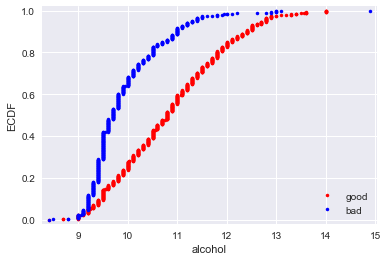

p-value = 0.0


In [50]:
# test good wine and bad wine samples on alcohol
good_wine = wine[wine.rating == 1]
bad_wine = wine[wine.rating == 0]
diff = np.mean(good_wine['alcohol'])-np.mean(bad_wine['alcohol'])

x_1, y_1 = ecdf(good_wine['alcohol'])
x_2, y_2 = ecdf(bad_wine['alcohol'])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

plt.margins(0.02)
_ = plt.xlabel('alcohol')
_ = plt.ylabel('ECDF')
_ = plt.legend(('good', 'bad'), loc='lower right')
plt.show()

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1)-np.mean(data_2)
    return diff
diff = diff_of_means(good_wine['alcohol'],bad_wine['alcohol'])
bs_replicates = np.empty(10000)
for i in range(10000):
    
    bs_sample = np.random.choice(wine['alcohol'], size=len(wine['alcohol']))
    
    bs_replicates[i] = diff_of_means(bs_sample[:len(good_wine['alcohol'])],
                                     bs_sample[len(good_wine['alcohol']):])

p = np.sum(bs_replicates >= diff) / 10000
print('p-value =', p)

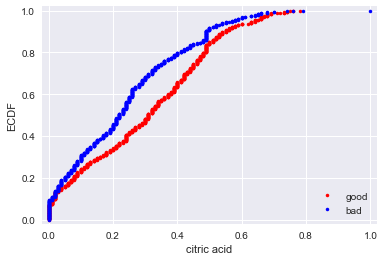

p-value = 0.0


In [51]:
# test good wine and bad wine samples on citric acid 
good_wine = wine[wine.rating == 1]
bad_wine = wine[wine.rating == 0]
diff = np.mean(good_wine['citric acid'])-np.mean(bad_wine['citric acid'])

x_1, y_1 = ecdf(good_wine['citric acid'])
x_2, y_2 = ecdf(bad_wine['citric acid'])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

plt.margins(0.02)
_ = plt.xlabel('citric acid')
_ = plt.ylabel('ECDF')
_ = plt.legend(('good', 'bad'), loc='lower right')
plt.show()

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1)-np.mean(data_2)
    return diff
diff = diff_of_means(good_wine['citric acid'],bad_wine['citric acid'])
bs_replicates = np.empty(10000)
for i in range(10000):
    
    bs_sample = np.random.choice(wine['citric acid'], size=len(wine['citric acid']))
    
    bs_replicates[i] = diff_of_means(bs_sample[:len(good_wine['citric acid'])],
                                     bs_sample[len(good_wine['citric acid']):])

p = np.sum(bs_replicates >= diff) / 10000
print('p-value =', p)

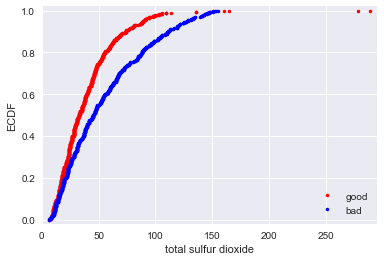

p-value = 1.0


In [52]:
# test good wine and bad wine samples on total sulfur dioxide

good_wine = wine[wine.rating == 1]
bad_wine = wine[wine.rating == 0]
diff = np.mean(good_wine['total sulfur dioxide'])-np.mean(bad_wine['total sulfur dioxide'])

x_1, y_1 = ecdf(good_wine['total sulfur dioxide'])
x_2, y_2 = ecdf(bad_wine['total sulfur dioxide'])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

plt.margins(0.02)
_ = plt.xlabel('total sulfur dioxide')
_ = plt.ylabel('ECDF')
_ = plt.legend(('good', 'bad'), loc='lower right')
plt.show()


def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1)-np.mean(data_2)
    return diff
diff = diff_of_means(good_wine['total sulfur dioxide'],bad_wine['total sulfur dioxide'])
bs_replicates = np.empty(10000)
for i in range(10000):
   
    bs_sample = np.random.choice(wine['total sulfur dioxide'], size=len(wine['pH']))
    
    bs_replicates[i] = diff_of_means(bs_sample[:len(good_wine['total sulfur dioxide'])],
                                     bs_sample[len(good_wine['total sulfur dioxide']):])

p = np.sum(bs_replicates >= diff) / 10000
print('p-value =', p)

AS we can see from the results, all test that we conduct by using boothstraping method has significant result meaning that the mean of each feature of each group
is statistically significant. However, we want to dig deeper on every feature.  

# What is the result of testing mean of every feature of good wine abd bad wine? 

in this section, we will use t-test as we do not know the distribution of each feature. Moreover, it will be much faster and 
easier to use t-test to test on a lot of feature. 

In [26]:
from scipy import stats
for column in wine.columns:  
    diff_mean_results = stats.ttest_ind(good_wine[column],bad_wine[column],equal_var = False)
    print(column , diff_mean_results)
# only residual sugar, pH that fail to reject the test 

fixed acidity Ttest_indResult(statistic=3.429690129057006, pvalue=0.0006224652259994661)
volatile acidity Ttest_indResult(statistic=-12.663112642586356, pvalue=1.0270784781602082e-34)
citric acid Ttest_indResult(statistic=6.301952761680176, pvalue=3.966613371490847e-10)
residual sugar Ttest_indResult(statistic=-0.08743750672371305, pvalue=0.9303367824350479)
chlorides Ttest_indResult(statistic=-4.175824466776456, pvalue=3.203283265747779e-05)
free sulfur dioxide Ttest_indResult(statistic=-2.5432543553431044, pvalue=0.011097105019784335)
total sulfur dioxide Ttest_indResult(statistic=-8.766046924165353, pvalue=6.337983150190238e-18)
density Ttest_indResult(statistic=-6.403466171052481, pvalue=2.098721635166707e-10)
pH Ttest_indResult(statistic=0.17297062036867633, pvalue=0.8627006248387413)
sulphates Ttest_indResult(statistic=7.888647833741197, pvalue=6.597118478126576e-15)
alcohol Ttest_indResult(statistic=18.742690953986735, pvalue=1.8012380348945214e-69)
quality Ttest_indResult(stati

From the results, only residual suger and pH fail to reject the test which means that the difference in mean of thoes features 
is not statistically significant. To sum up, after using ecdf , bootstraping, and t-test, the difference of mean of features between good wine and bad wine 
is statistically significant. Only two variables (residual suger and pH) is not statistically significant. 